Shaheer Hassan Notebook

Short Description of Dataset This dataset contains information on frequent flyer customers, including demographic details, flight activity, and loyalty tier levels. It provides insights into customer behavior, travel patterns, and loyalty engagement, which can be used to improve customer retention and target marketing strategies.

In [ ]:
import pandas as pd
!pip install pyspan
import pyspan as ps
import matplotlib.pyplot as plt


In [ ]:
path= '/content/flight.csv'
df = pd.read_csv(path)
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


Checking nulls

The dataset contains several columns with missing values

360 nulls value

In [ ]:
pd.set_option("display.max_row",None)
df.isnull().sum()


,0
MEMBER_NO,0
FFP_DATE,0
FIRST_FLIGHT_DATE,0
GENDER,3
FFP_TIER,0
WORK_CITY,2269
WORK_PROVINCE,3248
WORK_COUNTRY,26
AGE,420
LOAD_TIME,0


Dimensions and Structure of columns is checked

In [ ]:
df.shape


(62988, 23)

In [ ]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

Dropping Columns

Remove this unknown column

In [ ]:
df=ps.handle_nulls(df, columns='MEMBER_NO', action='remove', inplace=False)

In [ ]:
df =ps. detect_outliers(df, method='iqr', threshold=1.5,columns='AGE'  )

Total number of outliers detected across columns: 998
Original data shape: (62988, 23)
Data shape after removing outliers: (61570, 23)


*Removing nulls from column *

WORK_CITY
WORK_PROVINCE
GENDER
SUM_YR_1 and SUM_YR_2

In [ ]:
df=ps. handle_nulls(df, columns='WORK_CITY', action='remove', inplace=False)

In [ ]:
df=ps. handle_nulls(df, columns='WORK_PROVINCE', action='remove', inplace=False)

In [ ]:
df=ps. handle_nulls(df, columns='GENDER', action='impute', by='mode', inplace=False)

In [ ]:
df = ps. handle_nulls(df, columns='SUM_YR_1', action='impute', by='mean', inplace=False)

In [ ]:
df = ps. handle_nulls(df, columns='SUM_YR_2', action='impute', by='mean', inplace=False)

Gender Analysis

In [ ]:
df['GENDER'].value_counts()

,count
GENDER,
Male,44185
Female,13880


**Further concepts will reveal Univariate analysis, Bivariate analysis and Time series analysis**

** Univariate analysis**

Univariate analysis in Pandas refers to analyzing a single variable to understand its distribution, central tendency, and spread.

AGE (Numerical Variable)
A histogram to analyze the distribution of customer ages.

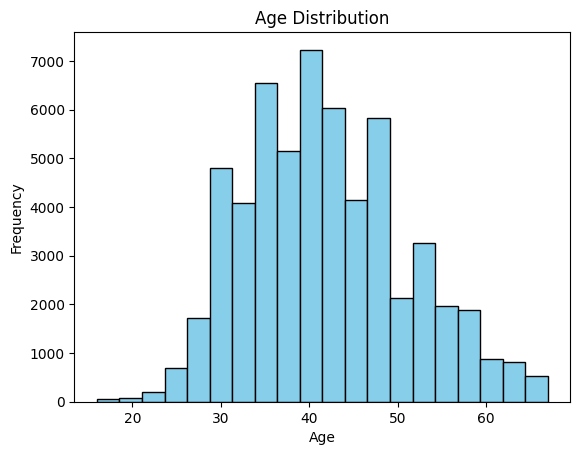

In [ ]:
df['AGE'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

GENDER (Categorical Variable)
A bar chart to analyze the gender distribution.

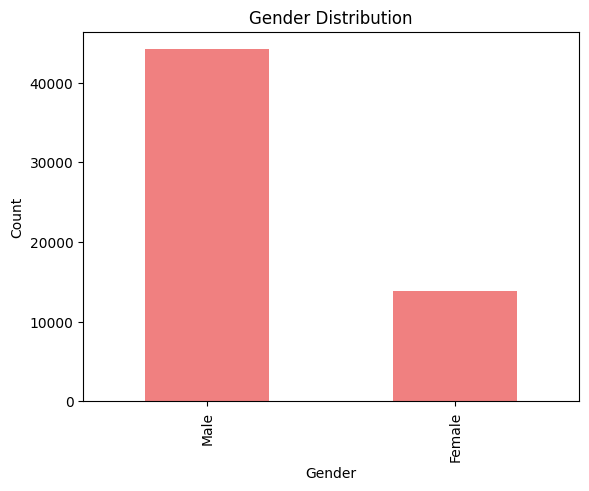

In [ ]:
df['GENDER'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

FFP_TIER (Categorical Variable - Frequent Flyer Program Tier)
A pie chart to visualize the proportion of customers in each tier.

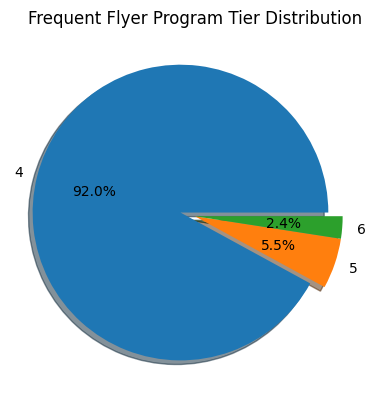

In [ ]:
df['FFP_TIER'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.1, 0, 0], shadow=True)
plt.title('Frequent Flyer Program Tier Distribution')
plt.ylabel('')
plt.show()

FLIGHT_COUNT (Numerical Variable)
A histogram for analyzing the distribution of flight counts.

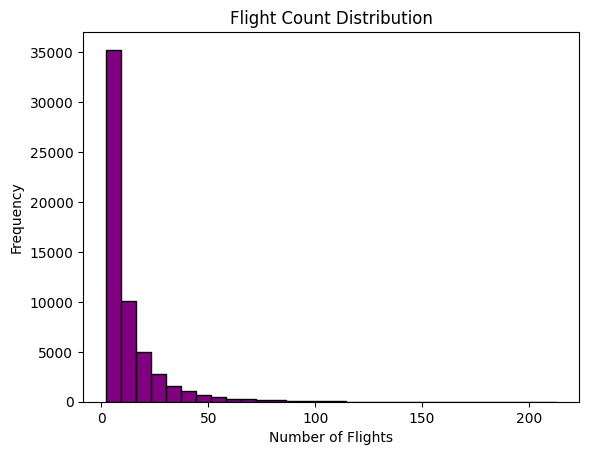

In [ ]:
df['FLIGHT_COUNT'].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Flight Count Distribution')
plt.xlabel('Number of Flights')
plt.ylabel('Frequency')
plt.show()


Bivariate analysis

For bivariate analysis, you analyze the relationship between two variables

AGE vs. FLIGHT_COUNT (Numerical vs. Numerical)

Use a scatter plot to explore the relationship between age and the number of flights taken.

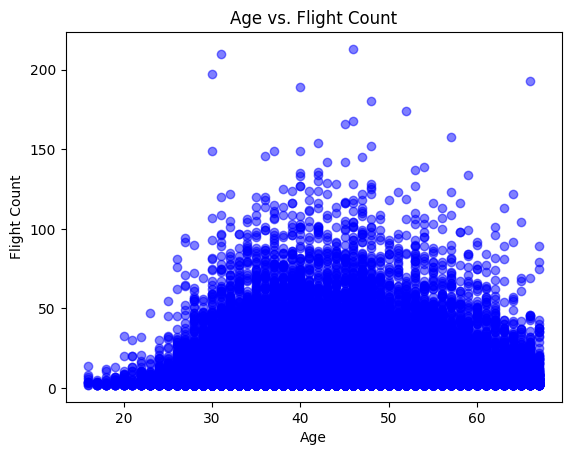

In [ ]:
plt.scatter(df['AGE'], df['FLIGHT_COUNT'], color='blue', alpha=0.5)
plt.title('Age vs. Flight Count')
plt.xlabel('Age')
plt.ylabel('Flight Count')
plt.show()

WORK_COUNTRY vs. AVG_INTERVAL (Categorical vs. Numerical)

Use a bar plot to compare the average flight interval by country.

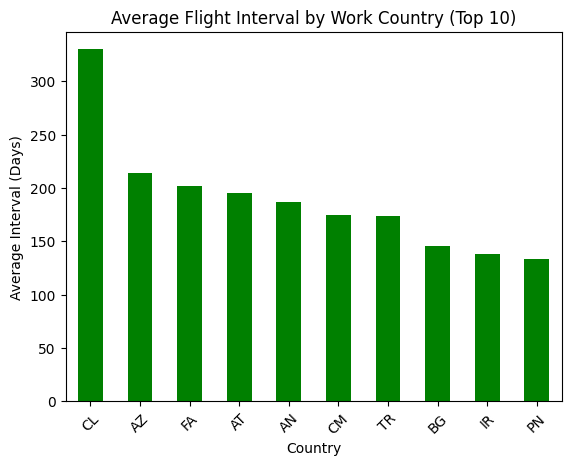

In [ ]:
df.groupby('WORK_COUNTRY')['AVG_INTERVAL'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Average Flight Interval by Work Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Interval (Days)')
plt.xticks(rotation=45)
plt.show()

TIME SERIES ANALYSIS

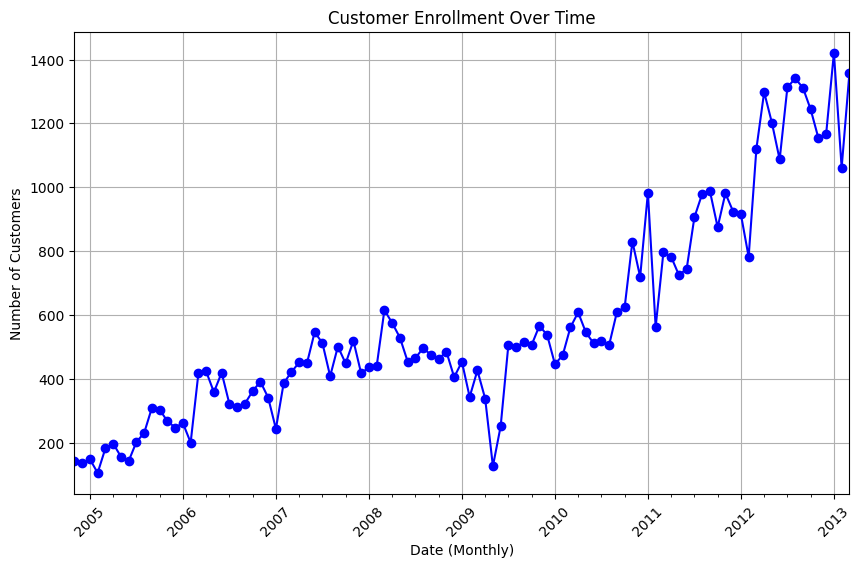

In [ ]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])

# Create a time series plot by grouping data by date and counting records
time_series_data = df.groupby(df['FFP_DATE'].dt.to_period("M")).size()

# Plot the time series
plt.figure(figsize=(10,6))
time_series_data.plot(kind='line', color='blue', marker='o')

plt.title('Customer Enrollment Over Time')
plt.xlabel('Date (Monthly)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Business Improvement Suggestions

To improve business, focus on the 35-45 age group with tailored promotions. Encourage Tier 4 flyers to move up by offering loyalty incentives, and retain top-tier customers with exclusive perks. Fix data quality issues for better accuracy and target inactive customers with special offers to reduce churn. Personalized marketing and event-based promotions can also boost engagement and satisfaction.